In [1]:
from BatteryProject.ModelOne import trainer

In [2]:
import pandas as pd


from BatteryProject import data
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
trainer = trainer.Trainer()

In [4]:
features = {
        'disc_capa' : 'summary_discharge_capacity.csv',
        'dis_ener' : 'summary_discharge_energy.csv',
        'temp_avg' : 'summary_temperature_average.csv',
        'char_capa' : 'summary_charge_capacity.csv'}

In [5]:
trainer.features = features



In [6]:
trainer.classes

[550]

In [7]:
trainer.deep

5

In [8]:
trainer.get_data(features)

/home/tom/code/TomG13100/BatteryProject/BatteryProject/ModelOne/get_features.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dict[key] = df_dict[key][filter == 0]


In [9]:
trainer.X_train

,disc_capa_0,disc_capa_1,disc_capa_2,disc_capa_3,disc_capa_4,dis_ener_0,dis_ener_1,dis_ener_2,dis_ener_3,dis_ener_4,temp_avg_0,temp_avg_1,temp_avg_2,temp_avg_3,temp_avg_4,char_capa_0,char_capa_1,char_capa_2,char_capa_3,char_capa_4
4,1.678763,1.069159,1.070689,1.071900,1.072510,5.166878,3.254210,3.258802,3.263190,3.265006,29.519066,31.888197,31.875011,31.931490,31.932604,1.123774,1.019853,1.023291,1.022842,1.023315
71,1.949726,1.064838,1.068205,1.070453,1.071333,6.173080,3.243127,3.246573,3.259565,3.263188,30.280647,32.968811,32.575954,32.742832,33.080105,1.448518,1.074415,1.077906,1.079281,1.080028
9,1.969953,1.071395,1.074521,1.076363,1.077149,6.233829,3.257201,3.264633,3.273947,3.276133,29.935772,32.246944,31.896320,32.248268,32.457020,1.448440,1.071397,1.074246,1.076030,1.076883
106,1.554189,1.060875,1.061775,1.062478,1.063071,4.761169,3.228362,3.231853,3.235014,3.237057,31.877169,32.469593,32.441982,32.451855,32.436012,1.028573,1.079694,1.081860,1.083108,1.083706
129,1.564024,1.067879,1.067856,1.068022,1.068105,4.803317,3.261651,3.262215,3.263505,3.264150,32.178303,34.624020,34.638020,34.632065,34.633034,1.057551,1.058711,1.059994,1.060953,1.061688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.676797,1.068212,1.070966,1.072108,1.072483,5.156089,3.246984,3.255838,3.259153,3.260862,29.785574,33.178627,33.187717,33.218983,33.219997,1.440095,1.068062,1.070990,1.071949,1.072570
40,1.666167,1.066294,1.068239,1.069389,1.070109,5.135186,3.247027,3.252709,3.256313,3.257877,31.005850,33.389481,33.320591,33.329144,33.322193,1.173774,1.091900,1.094660,1.095918,1.096691
76,1.693029,1.070203,1.072951,1.074008,1.074338,5.220398,3.257595,3.266709,3.270271,3.270901,31.028469,33.512745,33.520634,33.527515,33.519550,1.441334,1.066223,1.070237,1.071492,1.072232
50,1.542288,1.066573,1.067455,1.068285,1.068708,4.726026,3.250111,3.253550,3.256941,3.258964,30.950054,32.149494,32.106606,32.088512,32.086308,1.158017,1.074682,1.077327,1.078589,1.079203


In [10]:
trainer.set_pipeline()

In [11]:
trainer.pipeline.get_params()

{'memory': None,
 'steps': [('scaler',
   RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
                with_scaling=True)),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=3000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
              with_scaling=True),
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=3000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'scaler__

In [12]:
grid = {'model__penalty' : ['l2', 'none'],
        'model__solver' : ['lbfgs', 'sag'],
        'model__C' : [0.1, 0.5, 1.0, 5.0, 10.0] }

In [13]:
trainer.run(grid)

/home/tom/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1502: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/tom/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1502: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/tom/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1502: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/tom/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1502: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/tom/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1502: UserWarning: Setting penalty='none' will ignore th

In [14]:
trainer.grid_search.best_estimator_.predict(trainer.X_train.iloc[10:15,:]) == trainer.y_train.iloc[10:15]

0      True
3      True
130    True
25     True
132    True
Name: 549, dtype: bool

In [15]:
trainer.grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__C', 'param_model__penalty', 'param_model__solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [16]:
trainer.eval()

{'accuracy': 0.9512195121951219,
 'precision': 0.9666666666666667,
 'roc_auc': 0.9378787878787879}

In [17]:
trainer.y_train.mean()

0.6774193548387096

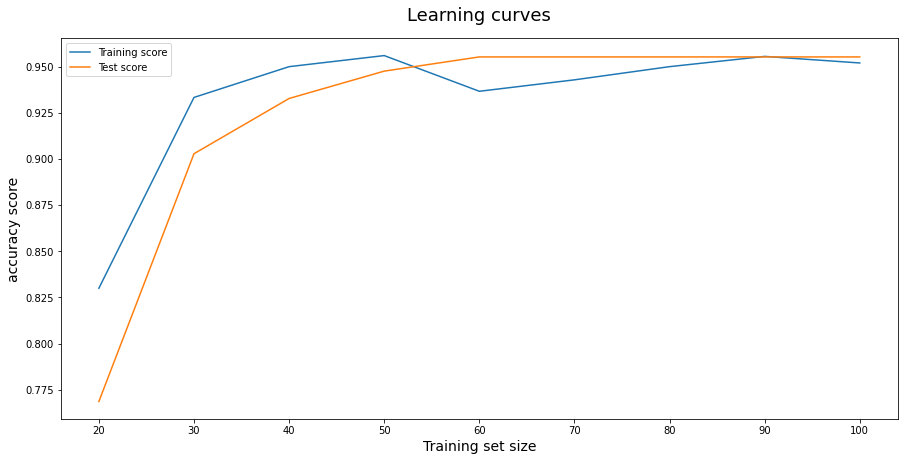

In [18]:
trainer.print_learning_curve()

In [ ]:
nb = 1
j = f"denk {nb}"
print(type(j))